In [34]:
# https://towardsdatascience.com/incremental-online-learning-with-scikit-multiflow-6b846913a50b
# https://stackoverflow.com/questions/57185958/how-to-normalize-data-before-evaluation-in-scikit-multiflow
from skmultiflow.data import SEAGenerator
from skmultiflow.data import WaveformGenerator


In [47]:
stream = SEAGenerator()      # create a stream
stream.prepare_for_use()     # prepare the stream for use


In [48]:
X,Y = stream.next_sample()


In [49]:
X

array([[0.26837076, 8.25699424, 0.44242035]])

In [50]:
Y

array([1], dtype=int64)

In [7]:
from skmultiflow.trees import HoeffdingTree
tree = HoeffdingTree()


In [23]:
correctness_dist = []
nb_iters = 1000
for i in range(nb_iters):
    X, Y = stream.next_sample()        # get the next sample
    prediction = tree.predict(X)       # predict Y using the tree     
    if Y == prediction:                # check the prediction
        correctness_dist.append(1)
    else:
        correctness_dist.append(0)   
   
    tree.partial_fit(X, Y)           # update the tree

In [24]:
import matplotlib.pyplot as plt
time = [i for i in range(1, nb_iters)]
accuracy = [sum(correctness_dist[:i])/len(correctness_dist[:i]) for i in range(1, nb_iters)]


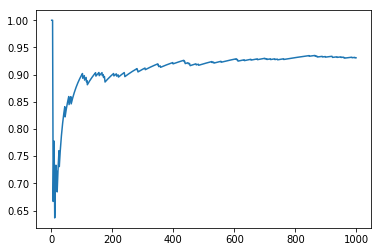

In [25]:
plt.plot(time, accuracy)

In [28]:
from skmultiflow.evaluation import EvaluatePrequential


In [29]:
evaluator=EvaluatePrequential(show_plot=True,max_samples=nb_iters)


Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 200 sample(s).
Evaluating...
 ####---------------- [20%] [0.01s]

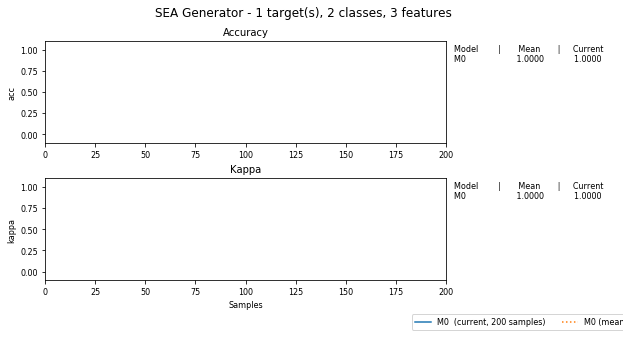

 #################### [100%] [0.66s]
Processed samples: 1000
Mean performance:
M0 - Accuracy     : 0.9413
M0 - Kappa        : 0.8677


[HoeffdingTree(binary_split=False, grace_period=200, leaf_prediction='nba',
               max_byte_size=33554432, memory_estimate_period=1000000,
               nb_threshold=0, no_preprune=False, nominal_attributes=None,
               remove_poor_atts=False, split_confidence=1e-07,
               split_criterion='info_gain', stop_mem_management=False,
               tie_threshold=0.05)]

In [30]:
evaluator.evaluate(stream=stream, model=tree)


In [ ]:
# Load data from a file as a stream and save test results into a file.
# https://scikit-multiflow.github.io/scikit-multiflow/user-guide.quick-start.html


Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 200 sample(s).
Evaluating...


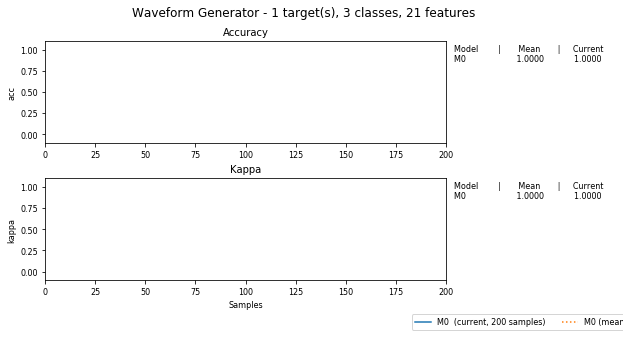

<Figure size 432x288 with 0 Axes>

 #------------------- [5%] [1.46s]

<Figure size 432x288 with 0 Axes>

 ##------------------ [10%] [2.70s]

<Figure size 432x288 with 0 Axes>

 ###----------------- [15%] [3.92s]

<Figure size 432x288 with 0 Axes>

 ####---------------- [20%] [5.14s]

<Figure size 432x288 with 0 Axes>

 #####--------------- [25%] [6.38s]

<Figure size 432x288 with 0 Axes>

 ######-------------- [30%] [7.68s]

<Figure size 432x288 with 0 Axes>

 #######------------- [35%] [8.92s]

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

 ########------------ [40%] [10.24s]

<Figure size 432x288 with 0 Axes>

 #########----------- [45%] [11.41s]

<Figure size 432x288 with 0 Axes>

 ##########---------- [50%] [12.62s]

<Figure size 432x288 with 0 Axes>

 ###########--------- [55%] [13.79s]

<Figure size 432x288 with 0 Axes>

 ############-------- [60%] [14.92s]

<Figure size 432x288 with 0 Axes>

 #############------- [65%] [16.10s]

<Figure size 432x288 with 0 Axes>

 ##############------ [70%] [17.27s]

<Figure size 432x288 with 0 Axes>

 ###############----- [75%] [18.41s]

<Figure size 432x288 with 0 Axes>

 ################---- [80%] [19.59s]

<Figure size 432x288 with 0 Axes>

 #################--- [85%] [20.74s]

<Figure size 432x288 with 0 Axes>

 ##################-- [90%] [21.91s]

<Figure size 432x288 with 0 Axes>

 #################### [100%] [24.28s]


<Figure size 432x288 with 0 Axes>

Processed samples: 20000
Mean performance:
M0 - Accuracy     : 0.8017
M0 - Kappa        : 0.7025


[HoeffdingTree(binary_split=False, grace_period=200, leaf_prediction='nba',
               max_byte_size=33554432, memory_estimate_period=1000000,
               nb_threshold=0, no_preprune=False, nominal_attributes=None,
               remove_poor_atts=False, split_confidence=1e-07,
               split_criterion='info_gain', stop_mem_management=False,
               tie_threshold=0.05)]

In [51]:
from skmultiflow.trees import HoeffdingTree
from skmultiflow.evaluation import EvaluatePrequential

# 1. Create a stream
stream = WaveformGenerator()
stream.prepare_for_use()

# 2. Instantiate the HoeffdingTree classifier
ht = HoeffdingTree()

# 3. Setup the evaluator
evaluator = EvaluatePrequential(show_plot=True,
                                pretrain_size=200,
                                max_samples=20000)

# 4. Run evaluation
evaluator.evaluate(stream=stream, model=ht)

<br><b>Regression Example <br><br>

In [60]:
# Imports
from skmultiflow.data.regression_generator import RegressionGenerator
# Setting up the stream
stream = RegressionGenerator(n_samples=100, n_features=20, n_targets=4, n_informative=6, random_state=0)
stream.prepare_for_use()


In [61]:
# Retrieving one sample
stream.next_sample()


(array([[ 0.16422776,  0.56729028, -0.76149221,  0.38728048, -1.69810582,
          0.85792392, -0.2226751 , -0.98551074,  1.46657872,  1.64813493,
          0.03863055,  1.14110187, -1.6567151 , -0.29183736, -1.02250684,
         -1.47183501, -1.61647419,  0.85255194, -2.25556423, -0.35343175]]),
 array([[-227.21175382, -208.69356686, -430.10330937, -439.69284148]]))

In [62]:
# Retrieving 10 samples
stream.next_sample(10)


(array([[-0.30309825,  0.44103291,  0.41287082, -0.14456682,  0.3595044 ,
         -0.1983989 ,  0.17879287, -0.40594173, -1.14761094,  1.38526155,
         -0.93788023,  0.0941923 ,  0.43310795,  0.28912051,  1.06458514,
          0.7243685 ,  0.24078751, -0.35811408, -0.36159928, -0.7994224 ],
        [ 1.04297759,  0.41409135, -0.94893281,  0.16464381,  1.04008625,
          0.13191176, -0.50723446, -0.32656098,  0.76877064, -0.52261942,
          0.38909397, -1.98056559,  1.17104106, -0.03926799,  1.47376482,
         -0.00820988,  1.04156839, -0.42132759,  0.88518754,  0.15466883],
        [-0.83912419, -1.01177408,  0.75746833, -0.6432576 ,  1.58776152,
         -0.01005647,  0.08496814, -0.0451133 , -1.04059923,  0.85053068,
         -0.14876615,  1.23800694,  0.0960042 ,  1.86668315,  0.99675964,
          0.07912172, -1.37305354, -0.31560312, -1.13359283, -1.60643969],
        [ 0.9508337 ,  0.55929898,  1.30718385, -1.64134861,  1.39053397,
         -0.46744101, -1.06369559, 

In [63]:
stream.n_remaining_samples()


89

In [64]:
stream.has_more_samples()


True

<br><br><b>Let's try to use data from a file <br><br><br>

In [56]:
import numpy as np
import pandas as pd
from skmultiflow.data import FileStream


In [54]:
location  = "E:/Big Data Diploma/Project/Project/New folder/Taxi/Green Taxi/"
New_Green_Taxi = pd.read_csv(location+'Green_Taxi_B7.csv')#,date_parser=dateparse)

In [69]:
New_Green_Taxi[:2]

,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,month,week,day,hour,Trip_distance,Final_Fare_amount,Trip_Duration
0,-75.231,39.928,-75.227,39.930,6.0,23.0,8.0,20.0,0.25,4.3,1.12
1,-75.165,39.954,-75.165,39.954,2.0,7.0,15.0,12.0,0.20,3.3,0.70


In [68]:
New_Green_Taxi.drop(columns =['speed' , 'log_Trip_distance' , 'log_Trip_Duration'], inplace = True) 


In [71]:
New_Green_Taxi.to_csv(r'E:/Big Data Diploma/Project/Project/New folder/Taxi/Green Taxi/Green_Taxi_Streaming.csv',index=False)


In [58]:
stream = FileStream("E:/Big Data Diploma/Project/Project/New folder/Taxi/Green Taxi/Green_Taxi_Streaming.csv")


In [ ]:
stream = FileStream("../datasets/elec.csv")
stream.prepare_for_use()


In [ ]:
# https://stackoverflow.com/questions/57185958/how-to-normalize-data-before-evaluation-in-scikit-
# https://scikit-multiflow.github.io/scikit-multiflow/_autosummary/skmultiflow.data.file_stream.html


<br>
<b> <font color="red">WORKING CODE USING MY DATASET</font>
<br>
<br>

<b>filepath</b> – Path to the data file

<b>target_idx (int, optional (default=-1))</b> – The column index from which the targets start.

<b>n_targets (int, optional (default=1))</b> – The number of targets.

<b>cat_features_idx (list, optional (default=None))</b> – A list of indices corresponding to the location of categorical features.


In [75]:
New_Green_Taxi[:2]

,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,month,week,day,hour,Trip_distance,Final_Fare_amount,Trip_Duration
0,-75.231,39.928,-75.227,39.930,6.0,23.0,8.0,20.0,0.25,4.3,1.12
1,-75.165,39.954,-75.165,39.954,2.0,7.0,15.0,12.0,0.20,3.3,0.70


In [79]:
New_Green_Taxi.columns.get_loc("Final_Fare_amount")

9

In [65]:
from skmultiflow.data.file_stream import FileStream
from skmultiflow.trees import MultiTargetRegressionHoeffdingTree
from skmultiflow.evaluation import EvaluatePrequential
from skmultiflow.meta import RegressorChain


In [87]:
stream = FileStream("E:/Big Data Diploma/Project/Project/New folder/Taxi/Green Taxi/Green_Taxi_Streaming.csv", target_idx=9, n_targets=2)
stream.prepare_for_use()
ht = MultiTargetRegressionHoeffdingTree()
rh = RegressorChain()


In [88]:
#ht.normalize_sample(stream.X)
# here it gives me an array of 10 zeros beacause examples_seen = 0
evaluator = EvaluatePrequential(show_plot=True,
                            pretrain_size=30000,
                            max_samples=200000, 
                           metrics = ['average_mean_absolute_error','average_root_mean_square_error'])
# print(ht.examples_seen) gives 0
evaluator.evaluate(stream=stream, model=[ht,rh], model_names=['MultiTargetRegressionHoeffdingTree', 'RegressorChain'])
# print(ht.examples_seen) gives 200000
#ht.normalize_sample(stream.X)
# even here it gives a error saying "op


Prequential Evaluation
Evaluating 2 target(s).
Pre-training on 30000 sample(s).
Evaluating...
 ###----------------- [15%] [9.77s]

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


 #################### [100%] [220.00s]
Processed samples: 200000
Mean performance:
MultiTargetRegressionHoeffdingTree - AMAE          : 2.246058
MultiTargetRegressionHoeffdingTree - ARMSE          : 2.871379
RegressorChain - AMAE          : 86952017865306644938752.000000
RegressorChain - ARMSE          : 119371807820213863317504.000000


[MultiTargetRegressionHoeffdingTree(binary_split=False, grace_period=200,
                                    leaf_prediction='perceptron',
                                    learning_ratio_const=True,
                                    learning_ratio_decay=0.001,
                                    learning_ratio_perceptron=0.02,
                                    max_byte_size=33554432,
                                    memory_estimate_period=1000000,
                                    nb_threshold=0, no_preprune=False,
                                    nominal_attributes=None, random_state=None,
                                    remove_poor_atts=False,
                                    split_confidence=1e-07,
                                    stop_mem_management=False,
                                    tie_threshold=0.05),
 RegressorChain(base_estimator=SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
        eta0=0.01, fit_intercept=True,